# phinance-financial-sales-analysis

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
b

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="phinance-financial-sales-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "olawumifadero-m/phinance-financial-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/olawumifadero-m/phinance-financial-sales-analysis


'https://jovian.ai/olawumifadero-m/phinance-financial-sales-analysis'

In [4]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
pip install openpyxl

     |████████████████████████████████| 242 kB 7.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
# loading data from Googlesheet
sheet_id = '1tBeyiiJLPQAfxXB5S4v4f3ZIwiciOA50Po1wcx3Ponc'
data_df = pd.read_excel(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")

In [9]:
# reading first five rows of the sales data
data_df.head()

,Segment,Country,Product code,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,2.0,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1.0,January,2014
1,Government,Germany,2.0,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1.0,January,2014
2,Midmarket,France,2.0,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6.0,June,2014
3,Midmarket,Germany,2.0,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6.0,June,2014
4,Midmarket,Mexico,2.0,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6.0,June,2014


In [10]:
# remove white spaces
data_df.columns = data_df.columns.str.strip()

In [11]:
#convert the column names to lowercase
data_df.columns = data_df.columns.str.lower()

In [12]:
data_df.columns = data_df.columns.str.replace(' ','_')
data_df.columns

Index(['segment', 'country', 'product_code', 'product', 'discount_band',
       'units_sold', 'manufacturing_price', 'sale_price', 'gross_sales',
       'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number',
       'month_name', 'year'],
      dtype='object')

In [13]:
# shape of the dataframe
data_df.shape

(700, 17)

In [14]:
# statistical summary of the numberic data types
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_df.describe()

,product_code,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,month_number,year
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,3.67,1608.29,96.48,118.43,182759.43,13150.35,169609.07,145475.21,24133.86,7.90,2013.75
std,1.59,867.43,108.60,136.78,254262.28,22962.93,236726.35,203865.51,42760.63,3.38,0.43
min,1.00,200.00,3.00,7.00,1799.00,0.00,1655.08,918.00,-40617.50,1.00,2013.00
25%,2.00,905.00,5.00,12.00,17391.75,800.32,15928.00,7490.00,2805.96,5.75,2013.75
50%,4.00,1542.50,10.00,20.00,37980.00,2585.25,35540.20,22506.25,9242.20,9.00,2014.00
75%,5.00,2229.12,250.00,300.00,279025.00,15956.34,261077.50,245607.50,22662.00,10.25,2014.00
max,6.00,4492.50,260.00,350.00,1207500.00,149677.50,1159200.00,950625.00,262200.00,12.00,2014.00


### Overall summary sales report

In [15]:
# To find the total sales, avarage sales, total cogs and total profit
total_gross_sales = data_df['gross_sales'].sum()
total_sales = data_df['sales'].sum()
average_sales = data_df['sales'].mean()
total_cogs = data_df['cogs'].sum()
total_profit = data_df['profit'].sum()

print(f"The Total Gross Sales: ${total_gross_sales}\n"
f"The total Sales from (2013 - 2014): ${round(total_sales,2)}\n"
f"The average sales: ${round(average_sales,2)}\n"
f"The total COGS: ${round(total_cogs,2)}\n"
f"The total profit: ${round(total_profit,2)}")

The Total Gross Sales: $127931598.5
The total Sales from (2013 - 2014): $118726350.26
The average sales: $169609.07
The total COGS: $101832648.0
The total profit: $16893702.26


In [16]:
# Max sales and profit
max_sales = data_df.sales.max()
min_sales = data_df.sales.min()
max_profit = data_df.profit.max()
min_profit = data_df.profit.min()

print(f"The Maximun Sales: ${round(max_sales,2)}\n"
f"The Minimum Sales: ${round(min_sales,2)}\n"
f"The Maximum Profit: ${round(max_profit,2)}\n"
f"The Minimum Profit: ${round(min_profit,2)}")

The Maximun Sales: $1159200.0
The Minimum Sales: $1655.08
The Maximum Profit: $262200.0
The Minimum Profit: $-40617.5


In [17]:
data_df.head(2)

,segment,country,product_code,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,2.00,Carretera,None,1618.50,3.00,20.00,32370.00,0.00,32370.00,16185.00,16185.00,2014-01-01,1.00,January,2014
1,Government,Germany,2.00,Carretera,None,1321.00,3.00,20.00,26420.00,0.00,26420.00,13210.00,13210.00,2014-01-01,1.00,January,2014


In [18]:
# Getting the frequency of the products
product_count = data_df.product_code.value_counts().reset_index()
product_count

,index,product_code
0,4.00,202
1,5.00,109
2,6.00,109
3,1.00,94
4,2.00,93
5,3.00,93


In [19]:
freq_product = data_df.groupby(['product'])['product_code'].count().reset_index()
freq_product

,product,product_code
0,Amarilla,94
1,Carretera,93
2,Montana,93
3,Paseo,202
4,VTT,109
5,Velo,109


In [20]:
freq_product.set_index('product_code', inplace=True)

In [21]:
#most ordered product
freq_product.loc[202]

product    Paseo
Name: 202, dtype: object

In [22]:
# Sales,cogs, profit by product
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_df.groupby('product')[['gross_sales','sales','cogs','profit']].sum()

,gross_sales,sales,cogs,profit
product,,,,
Amarilla,19037279.50,17747116.06,14933012.00,2814104.06
Carretera,14937520.50,13815307.88,11988503.00,1826804.89
Montana,16549834.50,15390801.88,13276047.00,2114754.88
Paseo,35611662.00,33011143.95,28213706.00,4797437.95
VTT,21968533.50,20511921.02,17477313.00,3034608.02
Velo,19826768.50,18250059.46,15944067.00,2305992.46


In [23]:
#Average discount by segment
disc_segment = data_df.groupby('segment')['discounts'].mean()
disc_segment

segment
Channel Partners    1345.68
Enterprise         14573.06
Government         12996.02
Midmarket           2007.87
Small Business     35137.82
Name: discounts, dtype: float64

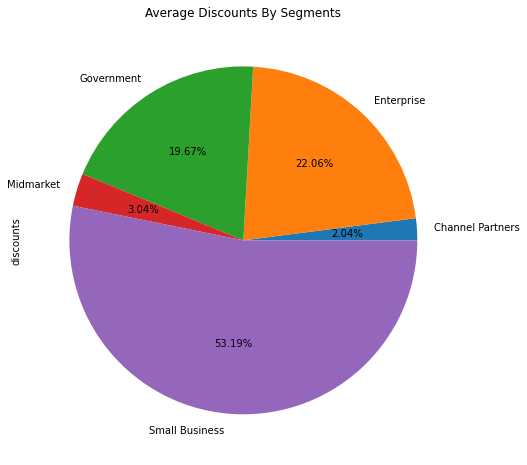

In [24]:
disc_segment.plot(kind='pie', title = 'Average Discounts By Segments', autopct='%1.2f%%', figsize=(12,8));

In [25]:
# Sales, COGS,Profits by Countries
pd.options.display.float_format = '${:,.2f}'.format
country_performance = data_df.groupby('country')[['sales','cogs','profit']].sum()
country_performance.sort_values('sales', ascending=False)

,sales,cogs,profit
country,,,
United States of America,"$25,029,830.16","$22,034,289.50","$2,995,540.67"
Canada,"$24,887,654.89","$21,358,426.00","$3,529,228.88"
France,"$24,354,172.28","$20,573,151.50","$3,781,020.78"
Germany,"$23,505,340.82","$19,824,952.00","$3,680,388.82"
Mexico,"$20,949,352.11","$18,041,829.00","$2,907,523.11"


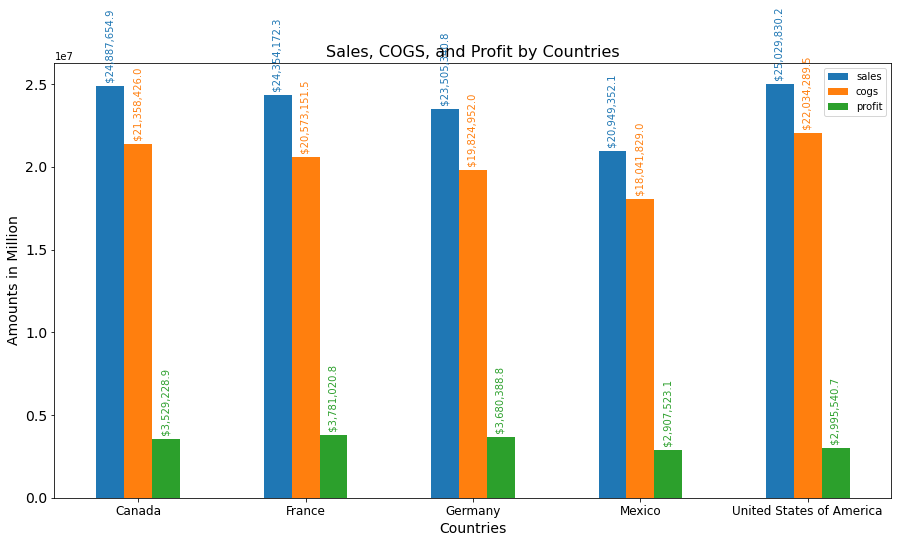

In [26]:
#Plotting the bar chart
ax = country_performance.plot(kind='bar', figsize = (15,8), fontsize=12)
plt.xlabel('Countries', fontsize = 14)
plt.ylabel('Amounts in Million', fontsize = 14)
plt.xticks(fontsize = 12, rotation = 360)
plt.yticks(fontsize = 14)
plt.title('Sales, COGS, and Profit by Countries', fontsize = 16);

# For each bar in the chart, add a text label
for bar in ax.patches:
    # The text annotation for rach bar should be its height
    bar_value = bar.get_height()
    # Format the text with commas, to separate thousands
    text = f' ${bar_value:,.1f}'
    # This will give the middle of each bar on the x-axis
    text_x = bar.get_x() + bar.get_width() / 2
    # get _y is where the bar starts so we add the height to it
    text_y = bar.get_y() + bar_value
    # getting the face color of the bar to be the font color of the label
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, rotation = 90, size=10)

### Yearly report

In [27]:
# Getting yearly report using the Pivot Table
data_df.pivot_table(index='year',values = ['sales', 'cogs','profit'], aggfunc=['sum','mean'], margins=True)

sum                                       mean             \
                cogs         profit           sales        cogs     profit   
year                                                                         
2013  $22,536,791.00  $3,878,464.51  $26,415,255.51 $128,781.66 $22,162.65   
2014  $79,295,857.00 $13,015,237.75  $92,311,094.75 $151,039.73 $24,790.93   
All  $101,832,648.00 $16,893,702.26 $118,726,350.26 $145,475.21 $24,133.86   

                  
           sales  
year              
2013 $150,944.32  
2014 $175,830.66  
All  $169,609.07

In [28]:
# Getting Sales and Profit by Product
sales_profit_by_product = data_df.pivot_table(index=['year','product'],values = ['sales', 'profit'], aggfunc='sum')
sales_profit_by_product.sort_values('sales', ascending=False)

profit          sales
year product                               
2014 Paseo     $3,697,584.86 $27,096,396.86
     VTT       $2,156,422.79 $15,110,493.79
     Amarilla  $2,032,154.53 $14,227,983.53
     Carretera $1,788,036.02 $12,408,442.03
     Velo      $1,684,042.71 $12,052,759.71
     Montana   $1,656,996.84 $11,415,018.84
2013 Velo        $621,949.76  $6,197,299.76
     Paseo     $1,099,853.09  $5,914,747.09
     VTT         $878,185.23  $5,401,427.23
     Montana     $457,758.04  $3,975,783.04
     Amarilla    $781,949.53  $3,519,132.53
     Carretera    $38,768.86  $1,406,865.86

In [29]:
!pip install jovian --upgrade --quiet

In [30]:
import jovian

In [31]:
b

<IPython.core.display.Javascript object>

[jovian] Updating notebook "olawumifadero-m/phinance-financial-sales-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/olawumifadero-m/phinance-financial-sales-analysis


'https://jovian.ai/olawumifadero-m/phinance-financial-sales-analysis'

In [33]:
# Getting sales by month in each year
sales_by_month_by_year = data_df.pivot_table(index='month_name',columns='year', values = 'sales', aggfunc='sum')
sales_by_month_by_year.fillna(0)

year,2013,2014
month_name,,
April,$0.00,"$6,964,775.07"
August,$0.00,"$5,864,622.42"
December,"$5,368,441.08","$11,998,787.90"
February,$0.00,"$7,297,531.39"
January,$0.00,"$6,607,761.68"
July,$0.00,"$8,102,920.18"
June,$0.00,"$9,518,893.82"
March,$0.00,"$5,586,859.87"
May,$0.00,"$6,210,211.06"


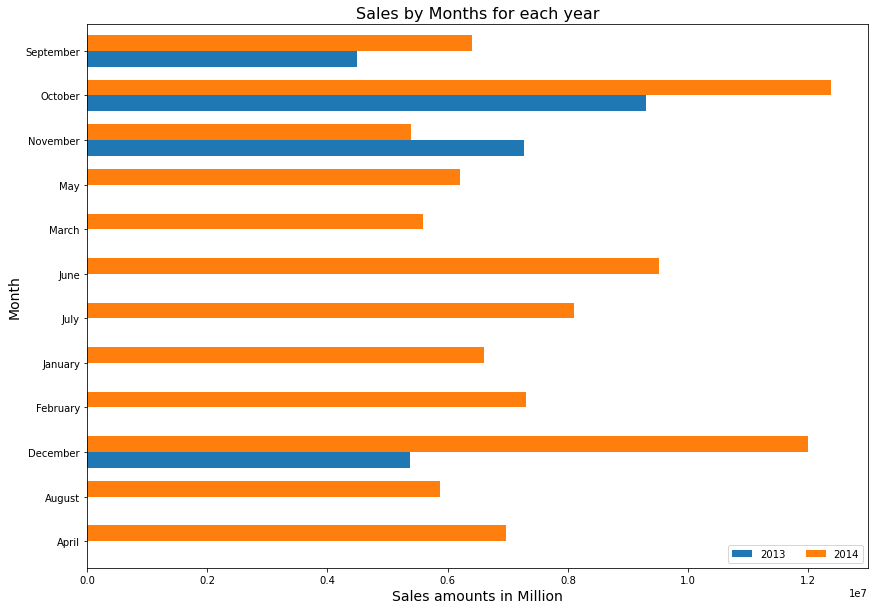

In [35]:
#Ploting the bar chart of sales by month
ax = sales_by_month_by_year.plot(kind='barh', width =.7, figsize = (14,10))
plt.legend(loc='lower right', ncol=2)
plt.title('Sales by Months for each year', fontsize = 16)
plt.ylabel('Month', fontsize = 14)
plt.xlabel('Sales amounts in Million', fontsize = 14);

In [36]:
# Getting profit by month in each year
profit_by_month_by_year = data_df.pivot_table(index='month_name',columns='year', values = 'profit', aggfunc='sum')
profit_by_month_by_year.fillna(0)

year,2013,2014
month_name,,
April,$0.00,"$929,984.57"
August,$0.00,"$791,066.42"
December,"$691,564.08","$2,025,765.90"
February,$0.00,"$1,148,547.39"
January,$0.00,"$814,028.68"
July,$0.00,"$923,865.68"
June,$0.00,"$1,473,753.82"
March,$0.00,"$669,866.87"
May,$0.00,"$828,640.06"


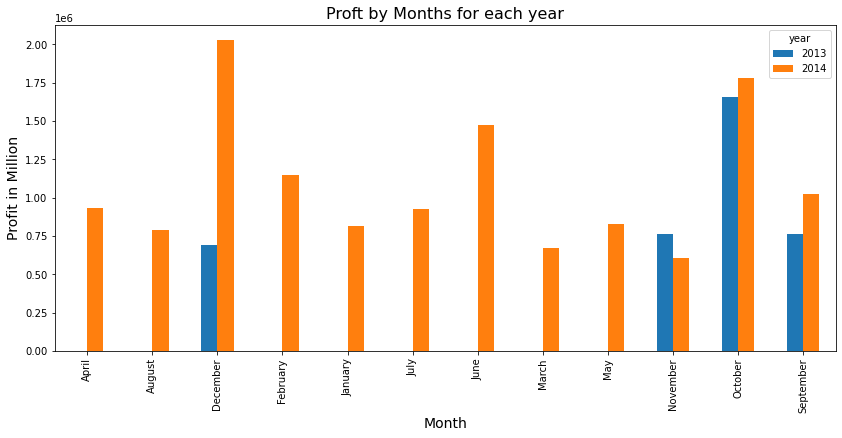

In [37]:
# Plotting the bar chart
profit_by_month_by_year.plot(kind='bar', figsize = (14,6))
plt.title('Proft by Months for each year', fontsize = 16);
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Profit in Million', fontsize = 14);

### Interpretation of findings from the analysis

* It was observed that Paseo product has the highest sales and product in the overall summary analysis
* Small business segment has the highest average discount of 53.19%.
* From the overall summary report, United States has the highest sales of `$25,029,830.16` while France has the highest profit of `$3,781,020.78` followed by Germany.
* From the yearly report, total sales increased by 249% and profit increased by 235% in 2014.
* In 2013, Velo product has the highest sales while in 2014, Paseo has the highest sales.


In [38]:
!pip install jovian --upgrade --quiet

In [39]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="phinance-financial-sales-analysis")

<IPython.core.display.Javascript object>